In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
# Step 1: Generate random data points for clustering
# 'make_blobs' is used to generate synthetic data points for clustering

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# n_samples=300: Specifies the total number of data points (samples) to generate, in this case, 300.
# centers=4: Defines the number of clusters or centroids to create, here set to 4.
# cluster_std=0.6: Controls the standard deviation (spread or "tightness") of the clusters; a lower value results in tighter clusters.
# random_state=0: Ensures reproducibility by setting a seed for the random number generator; using the same seed will generate the same data each time.


In [ ]:
# Step 2: Define the number of clusters
K = 4  # Number of clusters (K in K-Means)

# OR, USE ELBOW METHOD
# # List to store the sum of squared distances (inertia)
# inertia = [] (aka, WCSS)
# # Range of k values to test
# k_values = range(1, 11)
# # Perform k-means clustering for each k and compute inertia
# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(X)
#     inertia.append(kmeans.inertia_)
# # Finding the ideal value of k (inflection point)
# # Using the difference of inertia values to locate the elbow point
# diffs = np.diff(inertia)
# k_ideal = np.argmin(diffs) + 1

In [ ]:
# Step 3: Initialize centroids by randomly selecting K data points
np.random.seed(42)
centroids = X[np.random.choice(X.shape[0], K, replace=False)]

# X.shape[0]: Represents the total number of data points (samples) in X; this is the range from which indices are chosen.
# K: The number of unique indices to select, corresponding to the number of initial centroids for the clusters.
# replace=False: Ensures that the same index is not selected more than once, meaning the chosen centroids are unique.

In [ ]:
# Function to calculate the Euclidean distance between points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [ ]:
# Function to assign each data point to the nearest centroid
def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        # Calculate the distance to each centroid
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        # Assign to the nearest centroid (min distance)
        clusters.append(np.argmin(distances))
    return np.array(clusters)

In [ ]:
# Function to update centroids based on the assigned clusters
def update_centroids(X, clusters, K):
    new_centroids = []
    for k in range(K):
        # Compute the new centroid as the mean of all points assigned to it
        cluster_points = X[clusters == k] # get points in cluster 1, 2, 3, 4
        new_centroid = np.mean(cluster_points, axis=0) # find mean for each (axis=0 means finding mean along each column)
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

In [ ]:
# Step 4: K-Means iterative process function
def kmeans(X, K, iterations=100):
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]  # Initial random centroids
    for i in range(iterations):
        clusters = assign_clusters(X, centroids)  # Assign points to nearest centroid
        new_centroids = update_centroids(X, clusters, K)  # Update centroids

        # Check if centroids have changed significantly
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

In [ ]:
# Step 5: Run K-Means and get the final centroids and clusters
final_centroids, final_clusters = kmeans(X, K)

In [ ]:
# Step 6: Plot the clustered data and centroids
def plot_kmeans(X, final_clusters, final_centroids):
    plt.figure(figsize=(8, 6))

    # Scatter plot for data points, colored by their assigned clusters
    plt.scatter(X[:, 0], X[:, 1], c=final_clusters, s=30, cmap='viridis')

    # Plot the centroids
    plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', s=200, alpha=0.8, marker='X')

    # Title and labels
    plt.title("K-Means Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    plt.show()

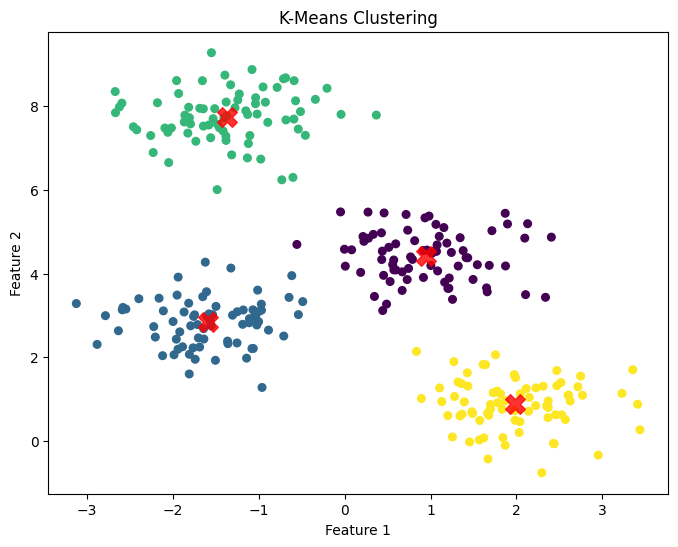

In [ ]:
# Step 7: Visualize the results
plot_kmeans(X, final_clusters, final_centroids)